In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.getcwd())

d:\Data Science Revision\MachineLearning\01_linear_regression


In [3]:
#companies = pd.read_csv("Data/1000_Companies.csv")
companies = pd.read_csv("../Data/1000_Companies.csv")
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [5]:
# Initialize OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the 'State' column
encoded_state = onehotencoder.fit_transform(companies[['State']])

In [6]:
# Convert the result to a DataFrame with appropriate column names
state_columns = onehotencoder.get_feature_names_out(['State'])
encoded_state_df = pd.DataFrame(encoded_state, columns=state_columns)

In [7]:
# Concatenate the original DataFrame (excluding 'State') with the one-hot encoded columns
companies_encoded = pd.concat([companies.drop('State', axis=1), encoded_state_df], axis=1)

In [8]:
companies_encoded

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,192261.83000,0.0,0.0,1.0
1,162597.70,151377.590,443898.5300,191792.06000,1.0,0.0,0.0
2,153441.51,101145.550,407934.5400,191050.39000,0.0,1.0,0.0
3,144372.41,118671.850,383199.6200,182901.99000,0.0,0.0,1.0
4,142107.34,91391.770,366168.4200,166187.94000,0.0,1.0,0.0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,1.0,0.0,0.0
996,134970.00,130390.080,329204.0228,164336.60550,1.0,0.0,0.0
997,100275.47,241926.310,227142.8200,413956.48000,1.0,0.0,0.0
998,128456.23,321652.140,281692.3200,333962.19000,1.0,0.0,0.0


In [9]:
# Separate features and target variable
X = companies_encoded.drop('Profit', axis=1)  # Features
y = companies_encoded['Profit']  # Target variable

In [13]:
#X
#y

In [14]:
companies_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Optional: Print model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

print("Intercept:", model.intercept_)


Mean Squared Error: 192148061.81508136
R^2 Score: 0.9112695892268794
Model Coefficients:
R&D Spend: 0.5258458571266049
Administration: 0.8443908810766612
Marketing Spend: 0.10757425545918575
State_California: 526.2352237464546
State_Florida: -354.3013746168969
State_New York: -171.93384912955838
Intercept: -51561.46494777108


In [ ]:
model.predict(X_test)

In [16]:
new_data_single = pd.DataFrame({
    'R&D Spend': [165349.20],
    'Administration': [136897.80],
    'Marketing Spend': [471784.10],
    'State_California': [0.0],
    'State_Florida': [0.0],
    'State_New York': [1.0]
})

expected_columns = X.columns  # Columns from training data
new_data_single = new_data_single[expected_columns]

prediction = model.predict(new_data_single)

In [17]:
prediction

array([201561.87025674])

In [18]:
prediction[0]

np.float64(201561.87025673635)

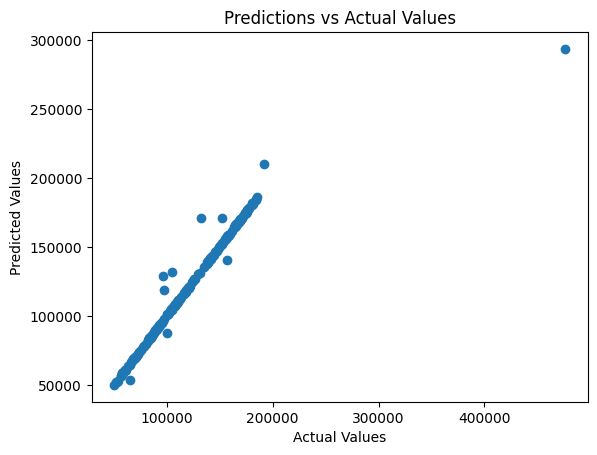

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.show()
